In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import sklearn
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import scale

import sklearn.metrics as sm
from sklearn import datasets
from sklearn.metrics import confusion_matrix,classification_report

In [2]:
# K-MEANS
# set plotting parameters for data visualizations
%matplotlib inline
plt.rcParams['figure.figsize'] = [7, 4]

In [4]:
# load iris dataset
iris = datasets.load_iris()

# scale data
X = scale(iris.data)

# set target variable
Y = pd.DataFrame(iris.target)
vriable_names = iris.feature_names

#print first 10 records of the dataset
X[0:10,]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ],
       [-0.53717756,  1.93979142, -1.16971425, -1.05217993],
       [-1.50652052,  0.78880759, -1.34022653, -1.18381211],
       [-1.02184904,  0.78880759, -1.2833891 , -1.3154443 ],
       [-1.74885626, -0.36217625, -1.34022653, -1.3154443 ],
       [-1.14301691,  0.09821729, -1.2833891 , -1.44707648]])

In [6]:
# clustering the data
# building cluster model
clustering = KMeans(n_clusters=3, random_state=5)
clustering.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=5, tol=0.0001, verbose=0)

In [7]:
# plotting model's output
iris_df = pd.DataFrame(iris.data)
iris_df.columns = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']
Y.columns = ['Targets']

Text(0.5, 1.0, 'K-Means Cassification')

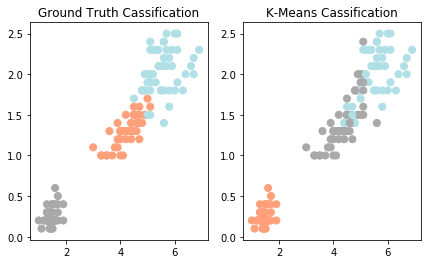

In [8]:
# create color theme for scatter chart
color_theme = np.array(['darkgray', 'lightsalmon', 'powderblue'])

# subplot (num_rows, num_columns, position)
plt.subplot(1, 2, 1)
plt.scatter(x=iris_df.Petal_Length, y=iris_df.Petal_Width, c=color_theme[iris.target], s=50) #s is marker size
plt.title('Ground Truth Cassification')

plt.subplot(1, 2, 2)
plt.scatter(x=iris_df.Petal_Length, y=iris_df.Petal_Width, c=color_theme[clustering.labels_], s=50)
plt.title('K-Means Cassification')

Text(0.5, 1.0, 'K-Means Cassification')

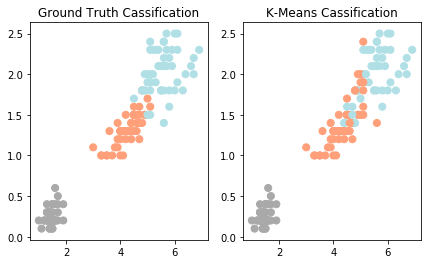

In [11]:
# re-coloring 2nd subplot
relable = np.choose(clustering.labels_,[1,0,2]).astype(np.int64)
plt.subplot(1,2,1)
plt.scatter(x=iris_df.Petal_Length, y=iris_df.Petal_Width, c=color_theme[iris.target], s=50)
plt.title('Ground Truth Cassification')

plt.subplot(1,2, 2)
plt.scatter(x=iris_df.Petal_Length, y=iris_df.Petal_Width, c=color_theme[relable], s=50)
plt.title('K-Means Cassification')

In [13]:
# evaluating results
print (classification_report(Y, relable))
# precision is a measure of the model's relevancy
# recall is a measure of the model's completeness
# high precision and hich recall indidate accurate model results

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.74      0.78      0.76        50
           2       0.77      0.72      0.74        50

    accuracy                           0.83       150
   macro avg       0.83      0.83      0.83       150
weighted avg       0.83      0.83      0.83       150

